In [1]:
from RNNEnv import RNNClass
from tensorflow.keras.layers import SimpleRNN, LSTM
import numpy as np

In [2]:
ModelRNN = RNNClass(feature_steps=252,target_steps=1,tickers = ['spy'],layers_LSTM=10,layers_RNN=10,batchnormalization=True, epochs = 125)

for m in [SimpleRNN,LSTM]:
    ModelRNN.Prediction(m)

c:\Users\yoshi\anaconda3\envs\SimulatingScenarios\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 324ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


c:\Users\yoshi\anaconda3\envs\SimulatingScenarios\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step


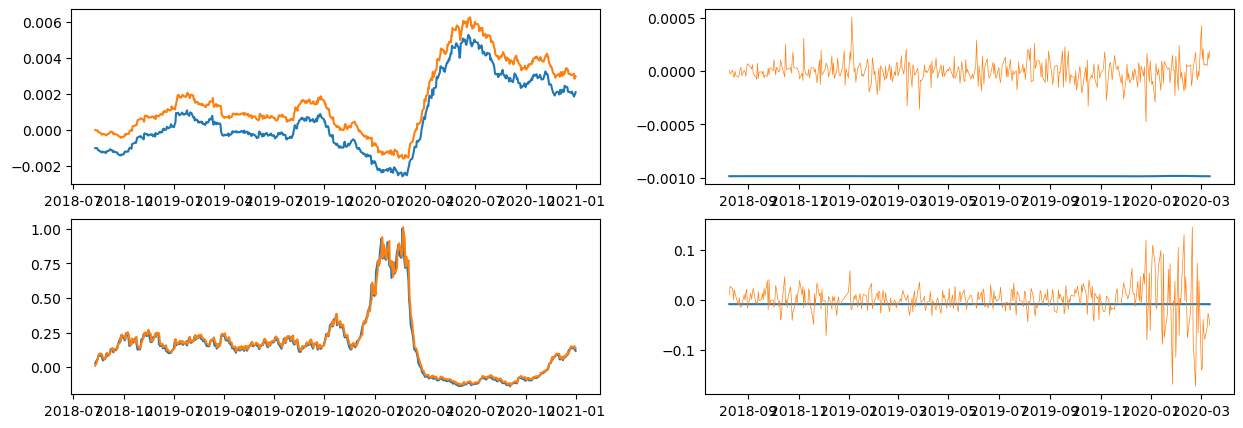

[[1.         0.99235889]
 [0.99235889 1.        ]]
[[ 1.        -0.0732933]
 [-0.0732933  1.       ]]


In [3]:
import matplotlib.pyplot as plt

T = len(ModelRNN.tickers)
fig, axes = plt.subplots(2, 2, figsize=(15, 5*T))

mod = 1  #SimpleRNN = 0, LSTM = 1

ticker = 'spy'

for var in [0,1]:
    k = list(ModelRNN.test_pred[ticker].keys())
    pred = ModelRNN.test_pred[ticker][k[mod]][:,var]
    test = ModelRNN.y_test[ticker][:,var]
    test_full = np.cumsum(test)
    pred_full = test_full[1:]+pred[:-1]
    test_full = test_full[:-1]

    axes[var,0].plot(ModelRNN.test_dates[ticker][k[mod]][1:],pred_full)
    axes[var,0].plot(ModelRNN.test_dates[ticker][k[mod]][1:],test_full)

    TT = 400
    axes[var,1].plot(ModelRNN.test_dates[ticker][k[mod]][:TT],pred[:TT], label = "prediction")
    axes[var,1].plot(ModelRNN.test_dates[ticker][k[mod]][:TT],test[:TT], label = "actual", linewidth=0.5)

# Show the plot
plt.show()

print(np.corrcoef(test_full,pred_full))
print(np.corrcoef(test,pred))

Text(0.5, 0, 'epoch')

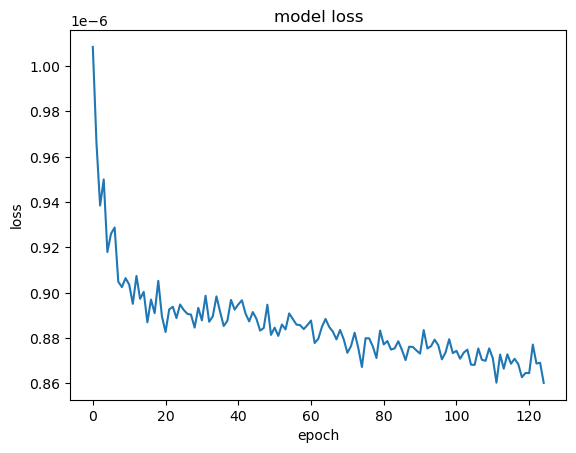

In [8]:
k = list(ModelRNN.test_pred[ticker].keys())

#plt.plot(ModelRNN.history['spy'][k[1]].history['loss'])
plt.plot(ModelRNN.history['spy'][k[1]].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper right')